<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/main/notebooks/Python_misc_SingularValueDecomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特異値分解と情報削減

このノートブックでは、行列の特異値分解と、その応用例として画像データの"低ランク近似"について説明する。

関連する線形代数の知識、とくに諸定理の証明については、適宜線形代数の教科書等を参照すること。

*純然たる*(≒形式的な？)線形代数の教科書には意外とSVDは載っていなかったりするので、工学であるとか数値計算など、応用を意識した教科書を参照するのが良い。

Webで無料のものが良ければ、Mathematics for Machine Learningもいいかもしれない  
※[著者らのページのリンク](https://mml-book.com)からPDFがダウンロードできる。


## 特異値分解 (Singular Value Decomposition, SVD)

特異値分解は、線形代数の中でも応用上非常に重要である。  
本ノートで説明するような画像処理や情報削減の方法として用いられるだけでなく、量子多体系(物性や素粒子・原子核などの物理学,量子化学などが対象とする系)の計算手法である密度行列くりこみ群(DMRG)法など、自然科学分野の理論計算などの根幹にもなっている汎用性の高い手法である。


**特異値分解定理**:  
任意のランク$r=[0,\min(m,n)]$の$m \times n$行列$A$は
- $m \times m$のユニタリ行列 $U$
- $m \times n$の対角行列$\Sigma$ 
- $n \times n$のユニタリ行列 $V$

を用いて$
A = U \Sigma V^\dagger
$
と分解できる。  
上は$A$が複素行列の場合の表記で、実行列の場合は、$U,V$は直交行列であり、随伴操作(複素共役かつ転置)$\dagger$は転置$T$となり、対角行列$\Sigma$の各成分は非負となる。  

以下では、特に断らない限り実行列の場合のみを考える。  
$\Sigma$の各対角成分を**特異値**と呼び、慣例的に$\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_r \geq 0$となるよう並べられる。  
※一般の$m \neq n$の場合は長方行列となるので、上での"対角行列"は正確には、対角ブロックとゼロ行列ブロックを含むような行列を指す。

$m<n$の場合は例えば以下のような形:  
$
\begin{pmatrix}
\sigma_1 & 0 &0 & 0 & ... & 0\\
0& \ddots & 0 & \vdots & \ddots & \vdots \\
0 & 0 & \sigma_r & 0& ... & 0 
\end{pmatrix}
$


ここで、特異値の数$r$は行列の階数(ランク)と一致する。  
値の大きな$\sigma_1$から$\sigma_k$まで($k\leq r$)を保持することで、行列の低ランク近似を得ることができる。

もう少し"低ランク近似"と見なせるように、上の表式を$U,V$の列ベクトル$u_1,...,u_m$, $v_1,...,v_n$を用いて書き換えてみよう:

行列の列ベクトルを用いた表記は
$
A = 
\begin{pmatrix}
u_1 & u_2 & \cdots & u_n
\end{pmatrix}
\begin{pmatrix}
\sigma_1 & ... & 0  \\
0 & \ddots &  0  \\
0 & ... &  \sigma_n 
\end{pmatrix}
\begin{pmatrix}
v_1 & v_2 & \cdots & v_n
\end{pmatrix}^T=\sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + ... + \sigma_r u_r v_r^T  
$
となる($r\leq n $)。

この表式と各$\sigma_i$が非負であることから、$A$を表現するのに、$\sigma_1$から$\sigma_r$を保持すればもとの$A$の情報が保たれるし、$k < r$までを保持すれば行列のある種の近似を与えていることが理解できる。

また、仮にrank $k$まででもとの行列$A$の"良い"※近似になっているならば、
保持すべき行列要素はもとの$mn$から、$(m+n)r + r$となり、$r \ll m,n$のときメモリの使用量を削減することもできる。  
機械学習で現れる行列演算は行列のサイズ"$N$に対して典型的には$\mathcal{O}(N^2-N^3)$を要するため、行列のサイズは小さいのに越したことはない。

※"良い"というのは曖昧な表現なので、なにか定義が必要である  


### $\clubsuit$発展的な注

なお、$\sigma_k$までを保持($\sigma_{k+1}=\ldots=\sigma_{n}=0$)した行列を$\Sigma'$とし計算した$A' = U\Sigma'V^T$は、フロベニウスノルムの意味で行列$A$のrank $k$における最良の近似を与えることが知られている:  
$||A-A'||_F = \sqrt{  \sum^m_i \sum^n_j (A_{ij} - A'_{ij} )^2 } $

上記の右辺から、近似が無い$A=A'$場合は0(最小)になることがわかる


特異値分解自体を自身で実装して使うのはたいへん教育的であるが実用的にはあまりオススメしない。  
というのも、数値誤差への配慮や数値計算の"コツ"を抑えなければ正しく実装するのは難しいだろう。  
(私はSVDのコードを自作したことはないが、Cholesky分解の実装で数値誤差の取り扱いで大変な苦労をした覚えがある)  

Pythonを始め多くの数値計算に適したプログラミング言語では、代表的な線形代数のアルゴリズムはBLAS(Basic Linear Algebra Subprograms) やLAPACK(Linear Algebra PACKage)と呼ばれるライブラリを読む形で実装されているので、これらをありがたく使わせてもらうのが安全だ。

#### 余談: 

吉田が大学１年生で線形代数を初めて勉強したとき、教科書を前から読んだだけでは(代数としての色が強い本だったこともあり)何に使えるのかわからず、なかなか勉強するモチベーションがわかなかった。  
その後、物理や計算科学の分野において,線形代数の種々の概念が現れることを知り少しずつ理解が得られ、今では「理系の大学生に何を勉強すべきかと問われたら「線形代数をやれ」と言うね!」と主張するに至った。特に"空間を張る"とか"基底"といった概念は、2年生になり量子力学を勉強するようになり腑に落ちた覚えがある。

行列分解も何のことはない、$100 \times 100$のピクセルを持つ画像ファイルを表現するのに、100個の線形独立なベクトル(長さ=100)が必ずしも必要な訳ではなく、少数($<100$)の基底で表現することが出来る、と言っているだけだ。
なぜなら、画像の背景部分などをイメージするとわかるように、画像のある行とある行(またはある列とある列)が互いに線形独立でない部分があるためである。



## Numpy&Scipyを用いたSVD

かんたんな行列の例とPythonのライブラリを用いてSVDを実行してみよう。

In [1]:
import numpy as np
from scipy import linalg
from numpy.linalg import svd, matrix_rank

# 適当な3×3行列(rank(A)=3)を作成して表示
A = np.array([ [1,9,6],[2,4,6],[3,8,3] ])
print("A\n",A, "\nrank", matrix_rank(A))

# SVD(特異値分解)を実行
U, Sigma, Vd = svd(A)
print('それぞれの行列(U,S,Vd)の形状を確認 =>', U.shape, Sigma.shape, Vd.shape)
print('特異値 => ', Sigma) #Sigmaは対角成分のみをベクトルのように持っている事がわかる。

#積がもとのAと一致するかcheck
print("USVd =>", np.dot(U, np.dot(np.diag(Sigma),Vd) ) )

#Sigmaをrank2で近似してみる ≒ 行列の(2,2)成分を0にする
Sigma[2] = 0.0
USVd = np.dot(U, np.dot(np.diag(Sigma),Vd) )
print("USVd@rank2 =>",  USVd)
print("||A-USVd||_F ", linalg.norm(A-USVd,"fro"))
#Sigmaをrank1で近似してみる ≒ 行列の(1,1)&(2,2)成分を0にする
Sigma[1] = 0.0
USVd = np.dot(U, np.dot(np.diag(Sigma),Vd) )
print("USVd@rank1 =>",  USVd)
print("||A-USVd||_F ", linalg.norm(A-USVd,"fro"))


A
 [[1 9 6]
 [2 4 6]
 [3 8 3]] 
rank 3
それぞれの行列(U,S,Vd)の形状を確認 => (3, 3) (3,) (3, 3)
特異値 =>  [15.52961563  3.39284204  1.82199376]
USVd => [[1. 9. 6.]
 [2. 4. 6.]
 [3. 8. 3.]]
USVd@rank2 => [[2.27571625 8.70200595 5.94787683]
 [1.22318899 4.18145497 6.03173892]
 [2.04499401 8.22307947 3.0390196 ]]
||A-USVd||_F  1.8219937599763407
USVd@rank1 => [[2.27747026 8.71226915 5.9321303 ]
 [1.46888535 5.61909622 3.82600794]
 [1.84748528 7.06739811 4.81214776]]
||A-USVd||_F  3.8511087217022104


確かに特異値分解ができているが、これだけではどんな恩恵があるのか、  
なぜ低ランク近似を考えるのかあまりピンとこないだろう。





## 画像データの特異値分解

では次に行列として、より具体的なもの、画像を考えてみよう。画像データは
- 縦横に並ぶピクセルの数を行列の行と列の数に対応させる
- 各ピクセルの画素値(8ビット,グレースケールで表現するなら、0が黒255が白の256階調)を各"番地"での行列要素の値に対応させる

ことで、自然と行列とみなすことができる。

適当な写真をもってきて、簡単のためグレースケールに変換した後、特異値分解をしてみよう。

宇都宮大学オリジナルキャラクター「宇～太」の写真を用いる

In [2]:
import requests
from PIL import Image
from IPython.display import display

!wget "https://raw.githubusercontent.com/SotaYoshida/Lecture_DataScience/main/notebooks/pic_for_notebook/u_ta.jpeg" -O u_ta.jpeg
# ls コマンドでファイルを表示
!ls 

--2022-10-11 06:41:42--  https://raw.githubusercontent.com/SotaYoshida/Lecture_DataScience/main/notebooks/pic_for_notebook/u_ta.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146087 (143K) [image/jpeg]
Saving to: ‘u_ta.jpeg’

u_ta.jpeg           100%[===================>] 142.66K  --.-KB/s    in 0.008s  

2022-10-11 06:41:43 (17.1 MB/s) - ‘u_ta.jpeg’ saved [146087/146087]

sample_data  u_ta.jpeg


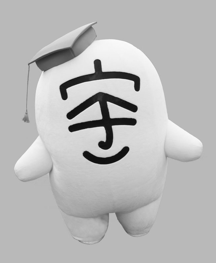

In [3]:
#画像ファイルを読み込み
img = Image.open('u_ta.jpeg')
gray_img = img.convert('L')
gray_img.save('u_ta_mono.jpeg')
gray_img = gray_img.resize((gray_img.width//3, gray_img.height//3))  #画像をリサイズ
gray_img 

full rank =>  196
rank 9  Fnorm  3371.396392985502  # of m.e.  4743


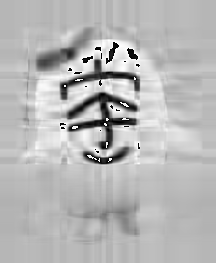

rank 19  Fnorm  1837.5080112082685  # of m.e.  10013


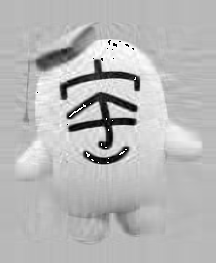

rank 39  Fnorm  883.9820242926976  # of m.e.  20553


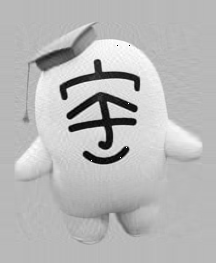

rank 58  Fnorm  513.8683243934796  # of m.e.  30566


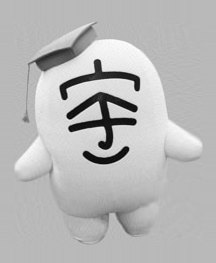

rank 196  Fnorm  8.531916171225453e-11  # of m.e.  103292


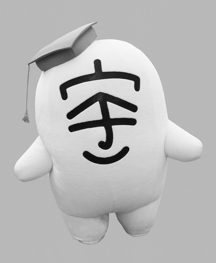

In [4]:
# SVDを実行
a = np.asarray(gray_img)
u, s, v = svd(a)
fullrank = matrix_rank(a)
print("full rank => ", fullrank)

# 陽に必要な行列要素の数を計算する関数
def num_of_me(u,s,v,rank):
    m,n = u.shape
    return m * rank + rank + rank*n

#低ランク近似を得る
for factor in [0.05, 0.1, 0.2, 0.3, 1.0]:
    rank = int(factor*fullrank)
    ur = u[:, :rank]
    sr = np.matrix(linalg.diagsvd(s[:rank], rank,rank))
    vr = v[:rank, :]
    b = np.asarray(ur*sr*vr)
    img = Image.fromarray(np.uint8(b))
    USVd = np.dot(ur, np.dot(sr,vr))
    print("rank",rank, " Fnorm ", linalg.norm(a-USVd,"fro"), " # of m.e. ", num_of_me(u,s,v,rank) )
    display(img)

幾つかのrankについて元のグレースケール画像との差分(フロベニウスノルム)と、陽に必要な行列要素の数、近似後の画像を表示させてみた。

元の行列(rank=196, 行列要素の数103292)に対して
rank=39, 58などでの近似を用いることで、大体2-3万の行列要素で画像を表現できる事がわかる。

今の場合は一枚の写真のみでサイズもたかがしれているものの、例えば画像認識タスクを行う機械学習モデルの訓練の場合には、一般に大量の画像データ(とラベル等)が必要になるため、近似で削減できる情報が数分の１スケールだとしても馬鹿にはできない。

実際にはSVDを計算するコストも勘定に入れなければフェアな評価は難しく、SVDを陽に用いたアーキテクチャがやりたいタスクに対して最適である保証はないが、実際に画像認識モデルを作り学習を行う際には一考の余地はあると言えるだろう。

### 練習問題

上では、`numpy.linalg`にある`svd`でSVDを実装し、`scipy`の`linalg.diagsvd`関数を用いて低ランク近似を計算した。
かんたんな行列の例を参考にSVDの結果得られる$\Sigma$の行列要素を書き換えて、もとの行列の低ランク近似を計算し、ライブラリの出力と一致するか確かめてみよう。※SVDや行列積などはnumpyを用いて良い。